In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No missing values in the dataset

In [9]:
df.duplicated().sum()

0

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
df['total_score'] = df['math score']+df['reading score']+df['writing score']
df['average_score'] = df['total_score']/3

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
reading_full = df[df['reading score'] == 100]['average_score'].count()
print(f'Number of students with full marks in Reading: {reading_full}')

writing_full = df[df['writing score'] == 100]['average_score'].count()
print(f'Number of students with full marks in Writing: {writing_full}')

math_full = df[df['math score'] == 100]['average_score'].count()
print(f'Number of students with full marks in Maths: {math_full}')

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Maths: 7


In [24]:
reading_fail = df[df['reading score'] < 25]['average_score'].count()
print(f'Number of students who failed in Reading: {reading_fail}')

writing_fail = df[df['writing score'] < 25]['average_score'].count()
print(f'Number of students who failed in Writing: {writing_fail}')

math_fail = df[df['math score'] < 25]['average_score'].count()
print(f'Number of students who failed in Maths: {math_fail}')

Number of students who failed in Reading: 4
Number of students who failed in Writing: 5
Number of students who failed in Maths: 7


Data Visualization

<Axes: xlabel='average_score', ylabel='Count'>

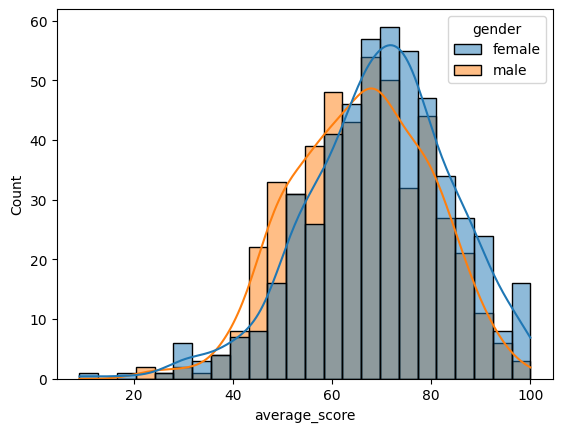

In [25]:

sns.histplot(data=df, x='average_score', kde=True, hue='gender')

Female students tend to perform better than the male students

<Axes: xlabel='average_score', ylabel='Count'>

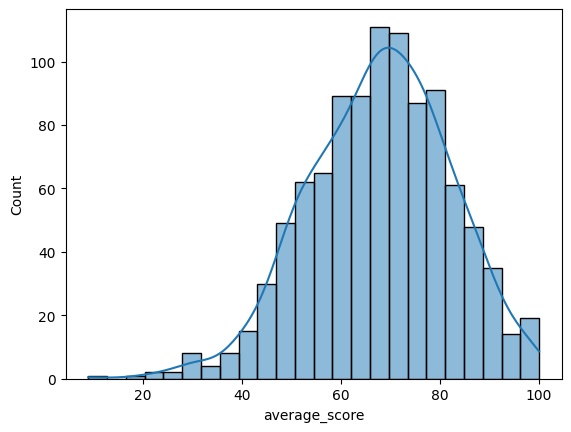

In [26]:
sns.histplot(data=df, x='average_score', kde=True)

<Axes: xlabel='average_score', ylabel='Count'>

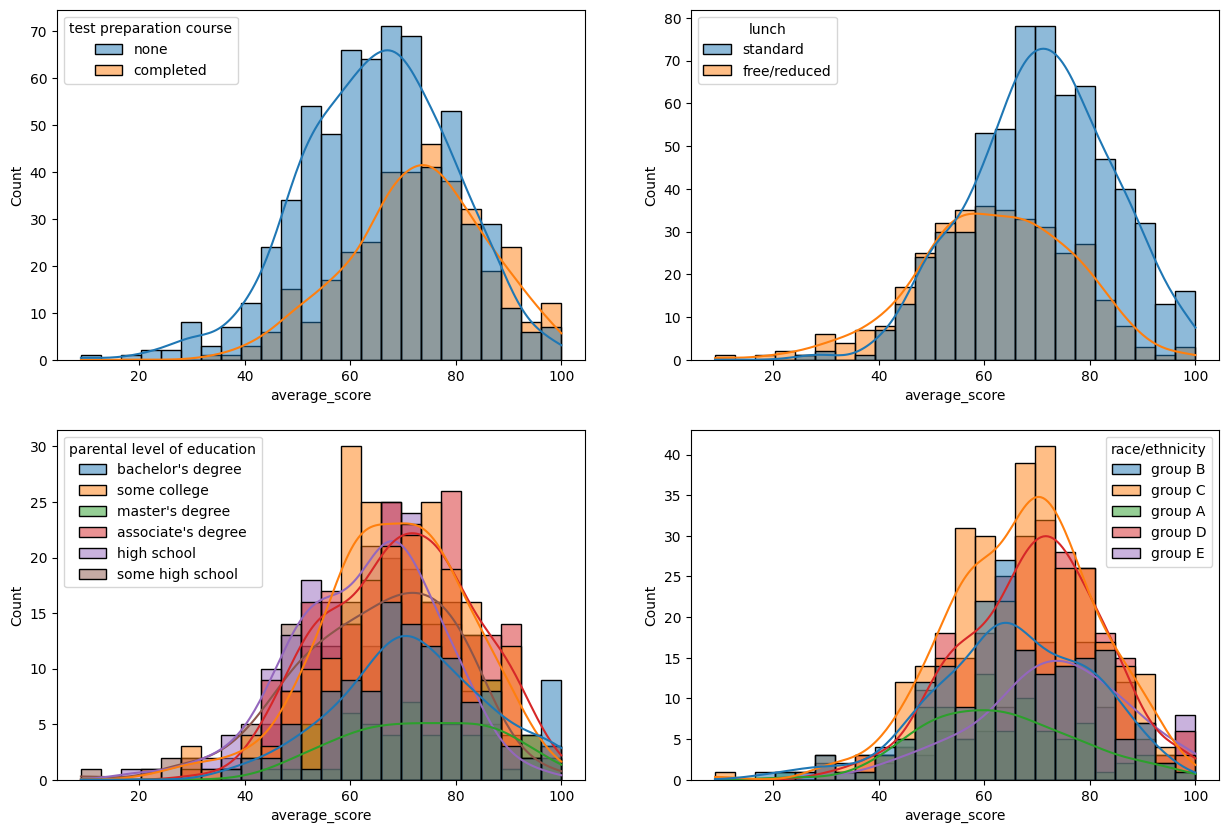

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.histplot(data=df, x='average_score', kde=True, hue='test preparation course')
plt.subplot(222)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.subplot(223)
sns.histplot(data=df, x='average_score', kde=True, hue='parental level of education')
plt.subplot(224)
sns.histplot(data=df, x='average_score', kde=True, hue='race/ethnicity')

Based on the above graphs we can say that:
1. Students who have haven't done any test course preparation performed better than the students who did.
2. Students having standard lunch are better performers compared to those students who have free/ reduced lunch.
3. In general, parents of students who are more educated tend to perform poor.
4. Students of Group A and Group E are poor perfromers.

<Axes: xlabel='average_score', ylabel='Count'>

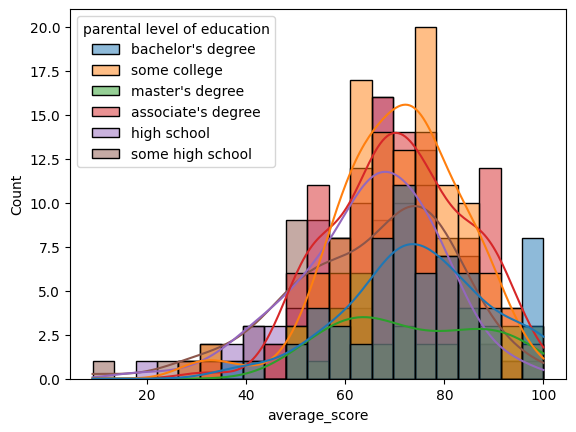

In [36]:
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='parental level of education')

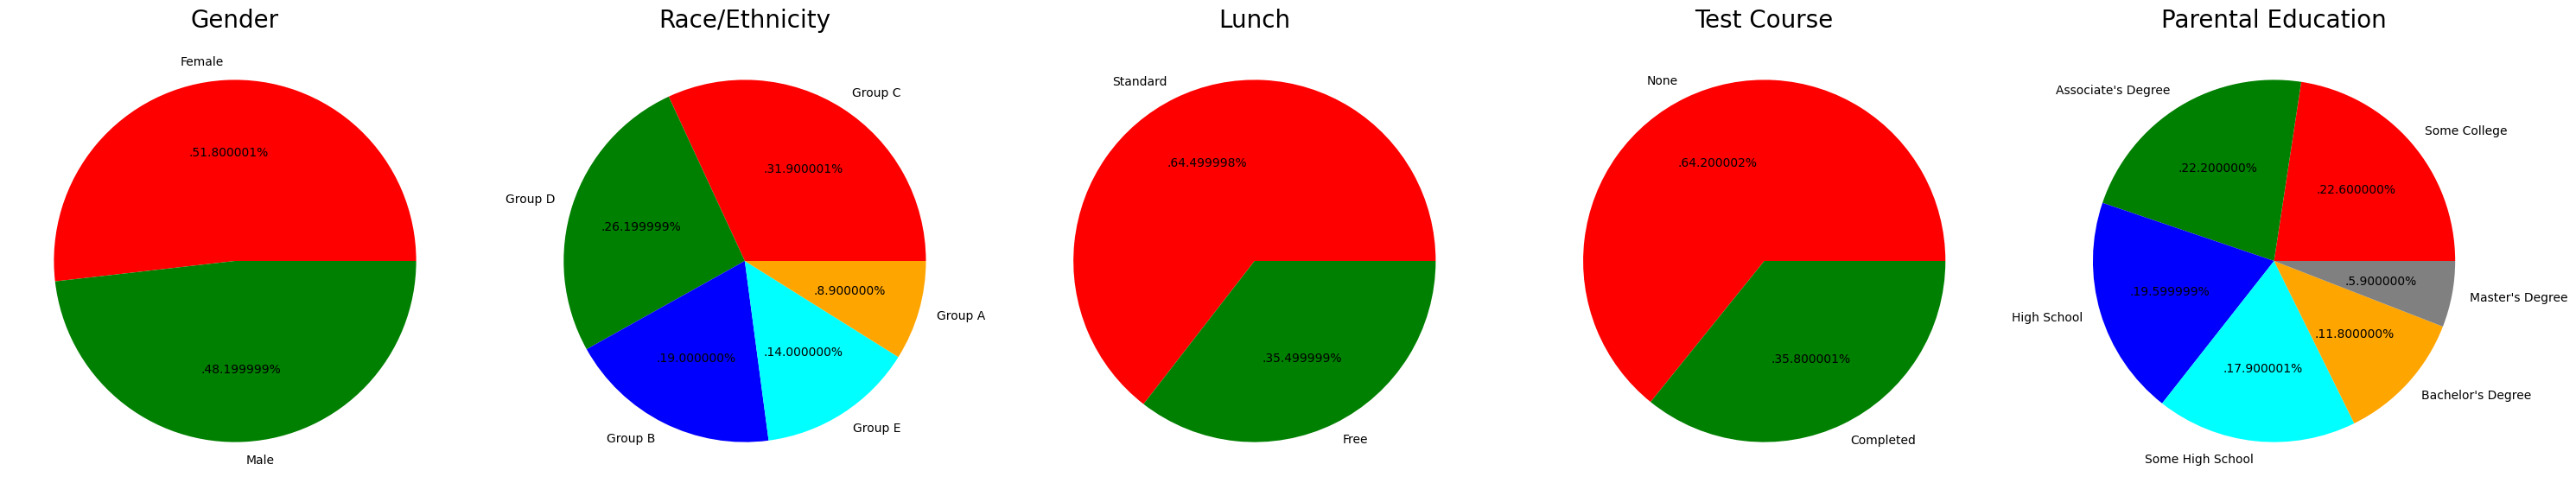

In [40]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

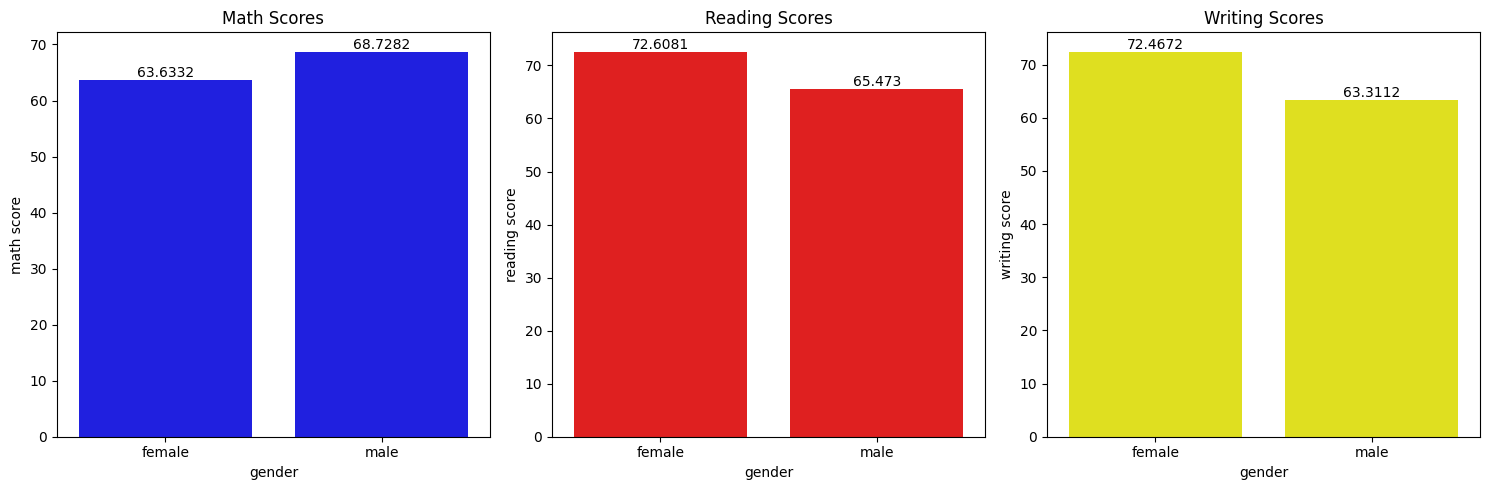

In [68]:
scores = ['math score', 'reading score', 'writing score']
colors = ['blue', 'red', 'yellow']
titles = ['Math Scores', 'Reading Scores', 'Writing Scores']

plt.figure(figsize=(15, 5))

for i, (score, color, title) in enumerate(zip(scores, colors, titles), start=1):
    plt.subplot(1, 3, i)
    gender_group = df.groupby('gender', as_index=False)[score].mean()
    ax = sns.barplot(x='gender', y=score, data=gender_group, color=color)
    ax.set_title(title)
    for bars in ax.containers:
        ax.bar_label(bars)

plt.tight_layout()
plt.show()


Overall the performance of female students is better than the male students, but male students temd to perform better in maths compared to female.

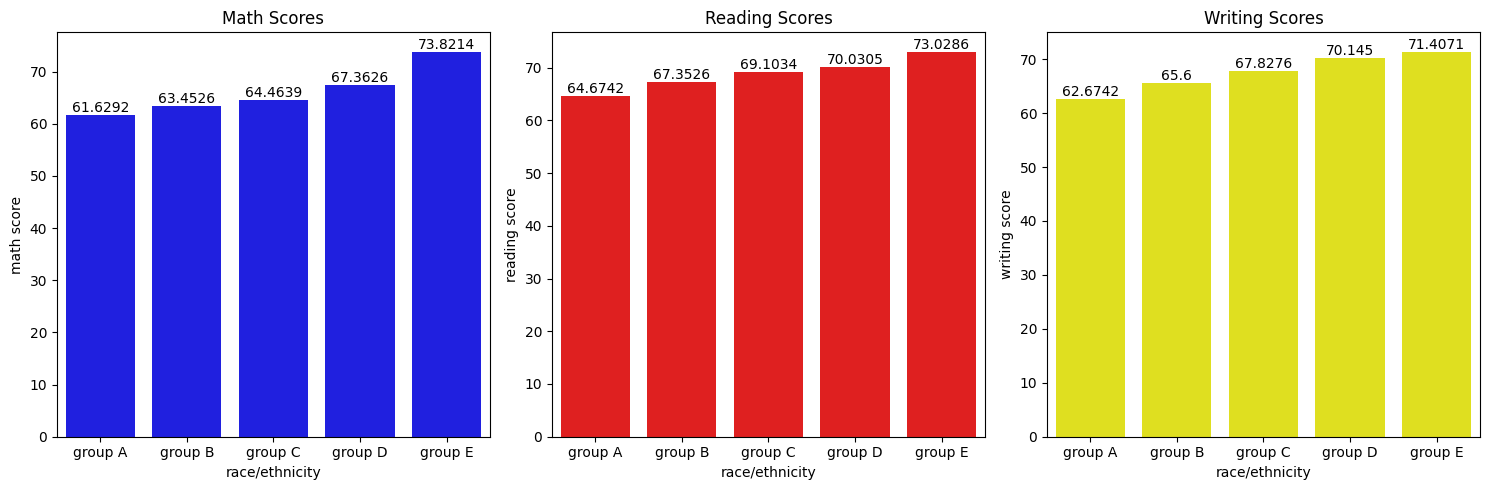

In [69]:
scores = ['math score', 'reading score', 'writing score']
colors = ['blue', 'red', 'yellow']
titles = ['Math Scores', 'Reading Scores', 'Writing Scores']

plt.figure(figsize=(15, 5))

for i, (score, color, title) in enumerate(zip(scores, colors, titles), start=1):
    plt.subplot(1, 3, i)
    race_group = df.groupby('race/ethnicity', as_index=False)[score].mean()
    ax = sns.barplot(x='race/ethnicity', y=score, data=race_group, color=color)
    ax.set_title(title)
    for bars in ax.containers:
        ax.bar_label(bars)

plt.tight_layout()
plt.show()

Students from group E perform the best and students from group A are the worst performers.

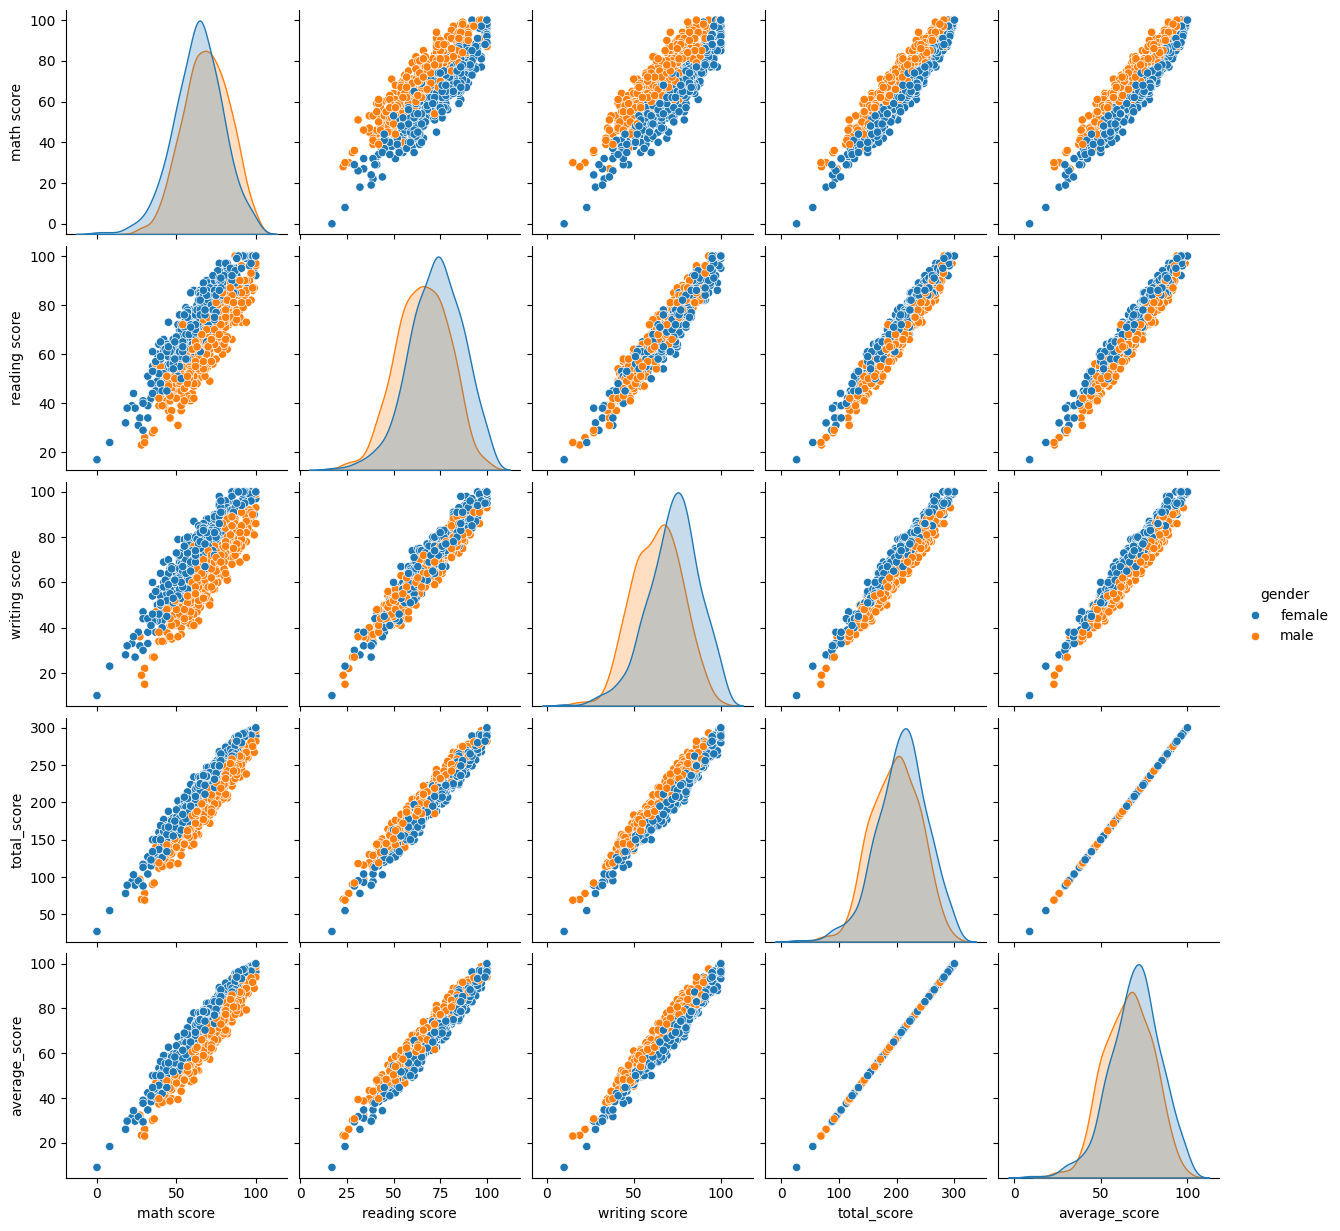

In [76]:
sns.pairplot(df,hue = 'gender')
plt.show()